In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.neural_network import MLPClassifier

In [6]:
# Load training and testing data from CSV files
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/train_set_after_pca.csv'
file_path2 = '/content/drive/MyDrive/Final year project/datafinal/test_set_after_pca.csv'

train_data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)

# Extract features and labels
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training time 0.91522216796875
Accuracy on test data: 99.44%
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
Mean Squared Error: 0.01
Mean Absolute Error: 0.01
Confusion Matrix:
 [[2307   19]
 [   9 2704]]


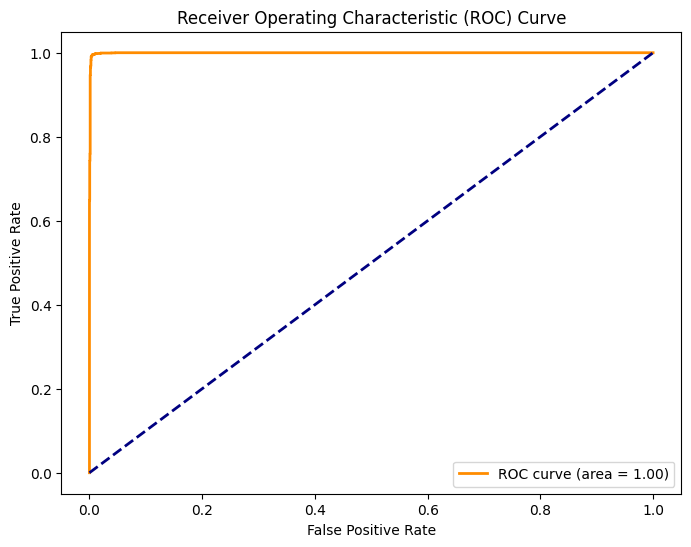

In [7]:

# Create and train the RBFN with HistGradient boosting classifier as core
rbf = HistGradientBoostingClassifier()
import time
s = time.time()
rbf.fit(X_train, y_train)
t = time.time() - s
print("Training time",t)
# Make predictions on the test set
y_pred = rbf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ... (your existing code)

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve
y_probs = rbf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
import joblib

# Save the trained RBFN model to a file
joblib.dump(rbf, '/content/drive/My Drive/Final year project/models/modelrbf.keras')

['/content/drive/My Drive/Final year project/models/modelrbf.keras']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-1c921e616e68>:31: RuntimeWarning: divide by zero encountered in divide
  hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))
<ipython-input-8-1c921e616e68>:31: RuntimeWarning: invalid value encountered in divide
  hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))


training time: 2.2858622074127197
Accuracy on test data: 95.44%
Precision: 0.95
Recall: 0.97
F1 Score: 0.96
Mean Squared Error: 0.05
Mean Absolute Error: 0.05
Confusion Matrix:
 [[2186  140]
 [  90 2623]]
Specificity: 0.94
False Positive Rate: 0.06


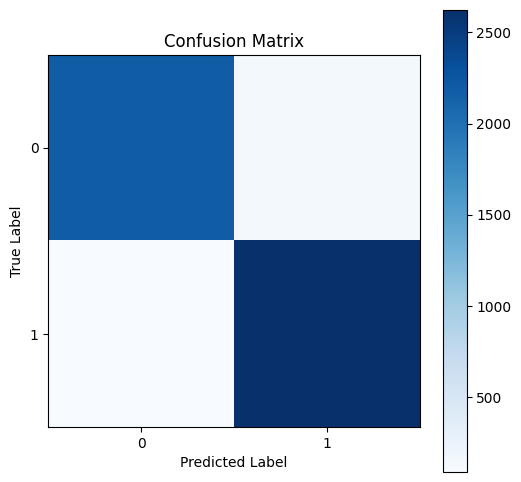

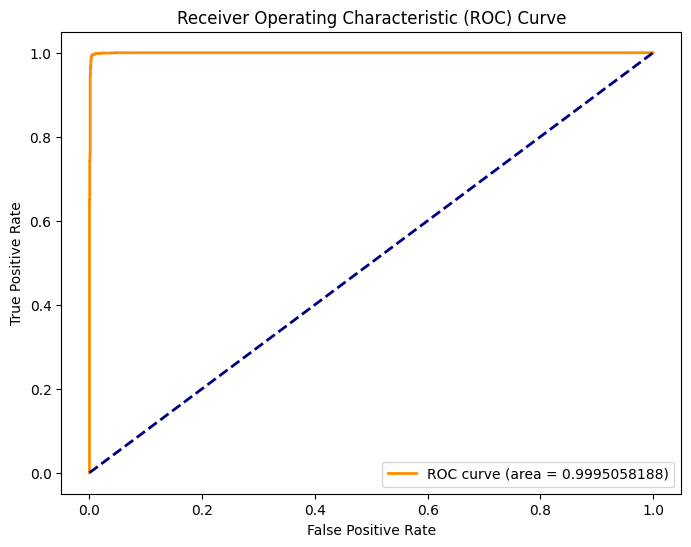

In [8]:
# Load training and testing data from CSV files
train_data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)
train_data.dropna(inplace=True)
# Extract features and labels
X_train = train_data.iloc[:, :22].values
y_train = train_data.iloc[:, 22].values
X_test = test_data.iloc[:, :22].values
y_test = test_data.iloc[:, 22].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train K-Means to determine centers and variances

num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train)
cluster_centers = kmeans.cluster_centers_
variances = np.zeros(num_clusters)

for i in range(num_clusters):
    variances[i] = np.mean(cdist(X_train[kmeans.labels_ == i], [cluster_centers[i]], 'euclidean'))

# Create the RBF Network with MLP as core
from sklearn.neural_network import MLPClassifier

# Set the hidden layer with RBF activation functions
hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))
rbf_classifier = MLPClassifier(hidden_layer_sizes=(num_clusters,), activation='identity', max_iter=1000)

# Train the RBF Network
s = time.time()
rbf_classifier.fit(X_train, y_train)
t = time.time() - s
print("training time:",t)
# Make predictions on the test data
y_pred = rbf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ... (your existing code)
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your predictions and true labels as y_pred and y_test

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Specificity and False Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

print("Specificity: {:.2f}".format(specificity))
print("False Positive Rate: {:.2f}".format(false_positive_rate))

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.10f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




Training Loss:  [0.6883568731468819, 0.4333998431158122, 0.3053783339408899, 0.23560188832675186, 0.19544819150013176, 0.1732033614717339, 0.16102731565057338, 0.15427591240859734, 0.149997843253801, 0.1468393107089502, 0.14508248271279928, 0.14367627240894604, 0.1429633419844634, 0.14310585134270584, 0.1426241052987655, 0.14235633076931134, 0.14233092033618033, 0.14235387544484285, 0.14205315912866182, 0.1420880511045969, 0.14184981925374848, 0.14222424230758687, 0.14206791209012223, 0.14189845456581124, 0.14199182319165607, 0.14193885810641962, 0.14216108181994785, 0.14224775393483083, 0.14205197115334675, 0.1417995277878411, 0.14194960271225038, 0.14186598527814037]
Test Loss:  [0.6883568731468819, 0.4333998431158122, 0.3053783339408899, 0.23560188832675186, 0.19544819150013176, 0.1732033614717339, 0.16102731565057338, 0.15427591240859734, 0.149997843253801, 0.1468393107089502, 0.14508248271279928, 0.14367627240894604, 0.1429633419844634, 0.14310585134270584, 0.1426241052987655, 0.1

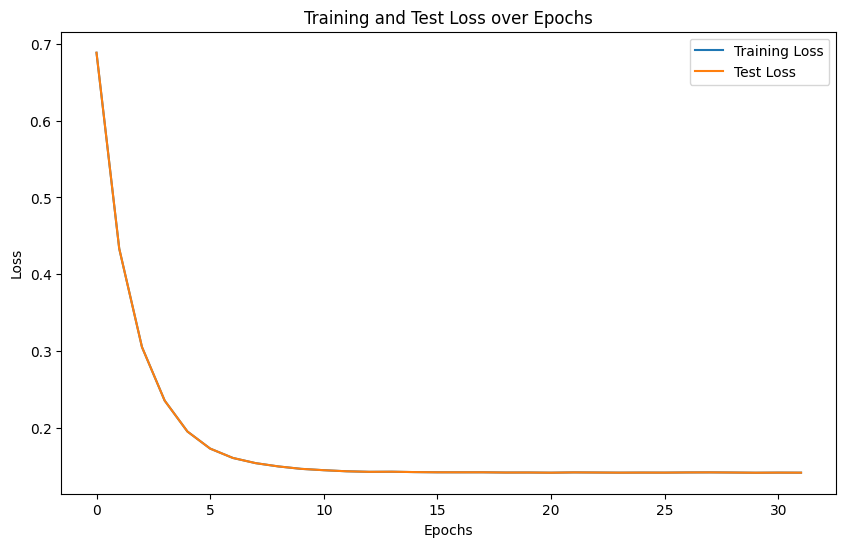

In [ ]:
# ... (previous code)

# Train the RBF Network with loss monitoring
history = rbf_classifier.fit(X_train, y_train)

# Access training loss over epochs
train_loss = history.loss_curve_

# Access test loss using the validation set
test_loss = rbf_classifier.loss_curve_


# Print training and test loss
print("Training Loss: ", train_loss)
print("Test Loss: ", test_loss)
# Plot Training and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
joblib.dump(rbf_classifier, '/content/drive/My Drive/Final year project/models/modelrbfn2.keras')

['/content/drive/My Drive/Final year project/models/modelrbfn2.keras']

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train)
cluster_centers = kmeans.cluster_centers_
variances = np.zeros(num_clusters)

for i in range(num_clusters):
    variances[i] = np.mean(cdist(X_train[kmeans.labels_ == i], [cluster_centers[i]], 'euclidean'))

# Create the RBF Network with MLP as core
from sklearn.neural_network import MLPClassifier

# Set the hidden layer with RBF activation functions
hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))
rbf_classifier1 = MLPClassifier(hidden_layer_sizes=(num_clusters,), activation='identity', max_iter=1000)

# Train the RBF Network
rbf_classifier1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rbf_classifier1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ... (your existing code)

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve
y_probs = rbf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-18eb591bfc49>:14: RuntimeWarning: divide by zero encountered in divide
  hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))
<ipython-input-9-18eb591bfc49>:14: RuntimeWarning: invalid value encountered in divide
  hidden_layer = np.exp(-cdist(X_train, cluster_centers, 'euclidean') / (2 * variances))
